In [159]:
import numpy as np
import pandas as pd
import datetime
import operator
df = pd.read_csv('C:\\Vimal Anand\\loads.csv', parse_dates=["collection_date","delivery_date"])
df = df[df.collection_longitude < -1.5]
df = df[df.collection_longitude > -3.5]
df = df[df.collection_latitude < 60]
df = df[df.collection_latitude > 55]
#df = df[:100]
df = df[df.collection_date > ('2015-10-06 11:00:00')]
X = np.array(list(zip(df['collection_longitude'], df['collection_latitude'])))
len(df)

81671

In [189]:
from sklearn.cluster import KMeans, MiniBatchKMeans
def k_means(X, n):
    # kmeans = KMeans(n_clusters=n)
    mbk = MiniBatchKMeans(n_clusters=n, batch_size=10000)
    # kmeans = kmeans.fit(X)
    mbk = mbk.fit(X)
    # labels = kmeans.predict(X)
    labels = mbk.predict(X)
    # C = kmeans.cluster_centers_
    C = mbk.cluster_centers_
    return C, mbk

centr, mb = k_means(X, 21)
d = {i: X[np.where(mb.labels_ == i)] for i in range(mb.n_clusters)}
d1 = {i: np.where(mb.labels_ == i)[0] for i in range(mb.n_clusters)}
# print(centr)
# print(d)
# print(d1)
import seaborn as sns
import matplotlib.pyplot as plt
k = d.keys()
v = list(d.values())
vids = list(d1.values())


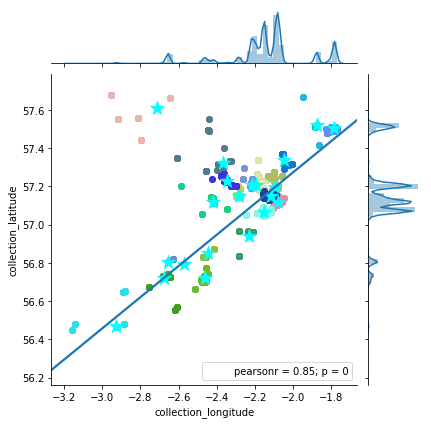

In [190]:
from random import randint
def ret_col():
    hello= ["1","2","3","4","5","6","7","8","9","a","b","c","e","d","f"]
    v="#"
    count=0
    for i in range(0,len(hello)):
        v=v+str(hello[randint(0,14)])
        count+=1
        if(count==6):
            #print(v)
            break
    return v

plt1 = sns.jointplot(x='collection_longitude', y='collection_latitude', data=df, kind='reg')
# col = ['yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
# col = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#0000ff", 'yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
for i in range(0, len(v)):
    plt1.ax_joint.scatter(v[i][:, 0], v[i][:, 1], color = ret_col())
plt.scatter(centr[:, 0], centr[:, 1], marker='*', s=200, c='aqua')

In [191]:
date_time11 = []
date_time21 = []
date_time31 = []
geo_loc =[]
for i in range(0, len(vids)):
    date_time1 = {}
    date_time2 = {}
    date_time3 = {}
    geo_loc1 = []
   # print(len(vids))
    for j in range(0, len(vids[i])):
        date_time1.update({vids[i][j]: [df['collection_longitude'].iloc[vids[i][j]], df['collection_latitude'].iloc[vids[i][j]]]})
        date_time2.update({vids[i][j]: df['collection_date'].iloc[vids[i][j]]})
        date_time3.update({vids[i][j]: [df['delivery_date'].iloc[vids[i][j]], df['size'].iloc[vids[i][j]]]})
        geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['collection_latitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_latitude'].iloc[vids[i][j]])
       # geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        #date_time1.append(df['collection_date'].iloc[vids[i][j]])
    date_time11.append(date_time1)
    date_time21.append(date_time2)
    date_time31.append(date_time3)
    geo_loc.append(geo_loc1)
# date_time
date_time_sorted1 = []
date_time_sorted2 = []
date_time_sorted3 = []
geo_loc_sorted=[]
for diction in date_time11:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted1.append(sorted_x)
for diction in date_time21:
    sorted_y = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted2.append(sorted_y)
for diction in date_time31:
    sorted_z = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted3.append(sorted_z)

In [192]:
c=[]
b=[]
for i in date_time_sorted3:
    e={}
    for j in i:
        key = j[1][0]
       # print(key)
        if key not in e:
               e[key]=[]
        e[key].append(j[1][1])
    c.append(e)
#c
for diction in c:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(0))
    #print(len(sorted_x))
    b.append(sorted_x)
    
g=[]
for i in range(0,len(date_time_sorted3)):
    for j in range(0,len(b[i])):
        g.append(b[i][j][1])

In [211]:
class Bin(object):
    """ Container for items that keeps a running sum """
    def __init__(self):
        self.items = []
        self.sum = 0

    def append(self, item):
        self.items.append(item)
        self.sum += item

    def __str__(self):
        """ Printable representation """
        return 'Bin(sum=%d, items=%s)' % (self.sum, str(self.items))

def bestFitDecreasing(values, maxValue):
    values = sorted(values, reverse=True)
    bins = []
    
    for item in values:
        # Try to fit item into a bin
        for bin in bins:
            if bin.sum + item <= maxValue:
                #print 'Adding', item, 'to', bin
                bin.append(item)
                break
        else:
            # item didn't fit into any bin, start a new bin
            #print 'Making new bin for', item
            bin = Bin()
            bin.append(item)
            bins.append(bin)
    
    return len(bins)    

n=0
for i in range(0,len(g)):
    aList= g[i]
    p=bestFitDecreasing(aList,1)
    n=n+p
n

53609

In [194]:
time=[]
for i in range(0,len(df)):
    time1={}
    time1.update({i: df['collection_date'].iloc[i]})
    time.append(time1)
time

sort_time=[]
for diction in time:
    sort_t= sorted(diction.items(),key=operator.itemgetter(1))
    sort_time.append(sort_t)

In [195]:
new_dict={}
for i in sort_time:
    key=i[0][1]
    if key not in new_dict:
        new_dict[key]=[]
    new_dict[key].append([i[0][0],df['collection_longitude'].iloc[i[0][0]],df['collection_latitude'].iloc[i[0][0]]])


temp=[]
dictList = []

for key, value in new_dict.items():
    temp = [key,value]
    dictList.append(temp)
dictList

[[Timestamp('2016-10-06 11:00:00'),
  [[0, -2.2142191000000366, 57.2398058],
   [2715, -2.0972816999999395, 57.1316216],
   [10724, -2.197053699999969, 57.2131249],
   [10725, -2.197053699999969, 57.2131249],
   [10726, -2.197053699999969, 57.2131249],
   [14164, -2.197053699999969, 57.2131249],
   [14165, -2.197053699999969, 57.2131249],
   [14166, -2.197053699999969, 57.2131249],
   [16846, -2.0727656999999913, 57.119382400000006]]],
 [Timestamp('2017-01-15 08:30:00'),
  [[1, -2.0819434999999658, 57.1278956],
   [2, -2.0819434999999658, 57.1278956],
   [3, -2.0819434999999658, 57.1278956],
   [4, -2.0819434999999658, 57.1278956],
   [5, -2.0819434999999658, 57.1278956],
   [6, -2.0819434999999658, 57.1278956]]],
 [Timestamp('2016-12-29 14:00:00'),
  [[7, -2.0685625076293945, 57.13987202575378],
   [2724, -2.2084755999999293, 57.196531799999995],
   [2765, -2.2084755999999293, 57.196531799999995],
   [9872, -2.0727656999999913, 57.119382400000006]]],
 [Timestamp('2016-12-28 11:30:00')

In [196]:
#for i in dictList
len(new_dict)

8461

In [197]:
vimal=[]
baghel=[]
for i in range(0,len(dictList)):
    vimal.append(dictList[i][1])
    k=len(dictList[i][1])
    anand={}
    for j in range(0,len(dictList[i][1])):
        anand.update({dictList[i][1][j][0]:[df['collection_longitude'].iloc[dictList[i][1][j][0]],df['collection_latitude'].iloc[dictList[i][1][j][0]]]})
    baghel.append(anand)

baghel

[{0: [-2.2142191000000366, 57.2398058],
  2715: [-2.0972816999999395, 57.1316216],
  10724: [-2.197053699999969, 57.2131249],
  10725: [-2.197053699999969, 57.2131249],
  10726: [-2.197053699999969, 57.2131249],
  14164: [-2.197053699999969, 57.2131249],
  14165: [-2.197053699999969, 57.2131249],
  14166: [-2.197053699999969, 57.2131249],
  16846: [-2.0727656999999913, 57.119382400000006]},
 {1: [-2.0819434999999658, 57.1278956],
  2: [-2.0819434999999658, 57.1278956],
  3: [-2.0819434999999658, 57.1278956],
  4: [-2.0819434999999658, 57.1278956],
  5: [-2.0819434999999658, 57.1278956],
  6: [-2.0819434999999658, 57.1278956]},
 {7: [-2.0685625076293945, 57.13987202575378],
  2724: [-2.2084755999999293, 57.196531799999995],
  2765: [-2.2084755999999293, 57.196531799999995],
  9872: [-2.0727656999999913, 57.119382400000006]},
 {8: [-2.4174960000000283, 57.1141564],
  9: [-2.4174960000000283, 57.1141564],
  10: [-2.4174960000000283, 57.1141564],
  15107: [-2.087892399999987, 57.1253515999

In [198]:
dictList1 = []

for diction in baghel:
    sort_b=sorted(diction.items(),key=operator.itemgetter(1))
    dictList1.append(sort_b)
len(dictList1[0][0][1])
len(dictList1)

8461

In [199]:
new_time_cluster={}
for i in range(0,len(dictList1)):
    #key=i[0][1]
    #print(key)
    for j in range(0,len(dictList1[i])):
        key=dictList1[i][j][1][0]
        key1=dictList1[i][j][1][1]
        key3=str(key)+str(',')+str(key1)
        #print(key3)
        if key3 not in new_time_cluster:
             new_time_cluster[key3]=[]
        new_time_cluster[key3].append(df['size'].iloc[dictList1[i][j][0]])

print(new_time_cluster) 


{'-2.2142191000000366,57.2398058': [1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 1.0, 1.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 1.0, 1.0, 1.0, 0.25, 0.25, 0.25, 0.25, 1.0, 1.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 1.0, 1.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 0.25, 0.25, 0.25, 0.25, 1.0, 1.0, 1.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.5, 0.5

In [200]:
temp1=[]
dictList2 = []

for key, value in new_time_cluster.items():
    temp1 = [key,value]
    dictList2.append(temp1)
len(dictList2)

503

In [201]:
dictList2[0][1]

[1.0,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 1.0,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 1.0,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 0.25,
 0.25,
 0.25,
 0.25,
 1.0,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.5,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 1.0,
 1.0,
 0.25,
 0.25,
 0.25,
 0.25,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.5,
 0.5,
 1.0,
 1.0,
 0.5,
 0.5,
 0.5,
 0.5,
 1.0,
 0.3333333333

In [217]:
n=0
for i in range(0,len(dictList2)):
        aList= dictList2[i][1]
        p=bestFitDecreasing(aList,1)
        n=n+p

In [218]:
n

51881

In [204]:
from __future__ import division

def checkClass(k, a):
    for i in range(k, 1, -1):
        if (a > (1.0/i) and a <= (1.0/(i-1))):
            clas = (i-1)
            break
        else:
            clas = k
    return (clas-1)

def nextFit(weight, n, c):
    res = 1
    bin_rem = c
    for i in range(0, n):
        if (weight[i] > bin_rem):
            res = res + 1
            bin_rem = c - weight[i]
        else:
            bin_rem = bin_rem - weight[i]
    return res

def harmonic(items_normal, cap, k):
    items = [i/cap for i in items_normal]
    bins_k = [] #items divided n classes, list of list
    res_k = [] #bins required in every class
    for i in range(0, k):
        classes = [] #single list
        bins_k.append(classes)
    for item in items:
        clas = checkClass(k, item)
        bins_k[clas].append(item)
    for classes in bins_k:
        if (len(classes) != 0):
            bins = nextFit(classes, len(classes), 1)
        else:
            bins = 0
        res_k.append(bins)
        #print(classes)
    res = 0
    #print(bins_k)
    for i in bins_k:
        print(len(i))
    for r in res_k:
        res = res + r
    print(res_k)
    return res

In [216]:
n=0
for i in range(0,len(dictList2)):
        aList= dictList2[i][1]
        p=len(dictList2[i][1])
        n=n+p
n

81671